# Name : Naveen Mathews Renji | CWID : 20016323 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt

## Load the dataset and remove rows with missing values

In [2]:
df = pd.read_csv('wisc_bc_ContinuousVar.csv')
df = df.dropna()

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
num_rows = df.shape[0]
print(num_rows)

569


## Extract features and diagnosis

In [5]:
features = df.drop(['id', 'diagnosis'], axis=1)
diagnosis = df['diagnosis']

## Standardize the features

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using hclust

In [7]:
hierarchical_clustering = linkage(scaled_features, method='ward')

### Assign the data to two clusters

In [8]:
cluster_assignments = fcluster(hierarchical_clustering, 2, criterion='maxclust')

### Tabulate the clustered rows against the "diagnosis" column

In [9]:
results = pd.DataFrame({'Cluster': cluster_assignments, 'Diagnosis': diagnosis})
cluster_diagnosis_counts = results.groupby(['Cluster', 'Diagnosis']).size().reset_index(name='Count')

print(cluster_diagnosis_counts)

   Cluster Diagnosis  Count
0        1         B    337
1        1         M     48
2        2         B     20
3        2         M    164


### Plot

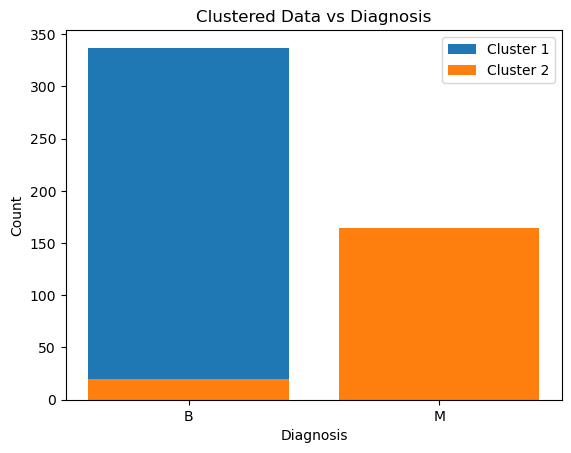

In [10]:
fig, ax = plt.subplots()

for cluster, group in cluster_diagnosis_counts.groupby('Cluster'):
    ax.bar(group['Diagnosis'], group['Count'], label=f"Cluster {cluster}")

ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Clustered Data vs Diagnosis')
ax.legend()

plt.show()

# Using KMeans 

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=2, random_state=42)

## Assigning data and tabulating it 

In [12]:
cluster_assignments = kmeans.labels_
results = pd.DataFrame({'Cluster': cluster_assignments, 'Diagnosis': diagnosis})
cluster_diagnosis_counts = results.groupby(['Cluster', 'Diagnosis']).size().reset_index(name='Count')

print(cluster_diagnosis_counts)

   Cluster Diagnosis  Count
0        0         B     14
1        0         M    175
2        1         B    343
3        1         M     37


## Plot

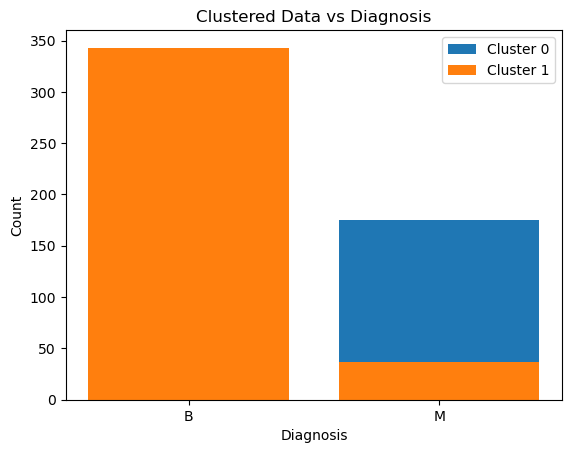

In [13]:
fig, ax = plt.subplots()

for cluster, group in cluster_diagnosis_counts.groupby('Cluster'):
    ax.bar(group['Diagnosis'], group['Count'], label=f"Cluster {cluster}")

ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Clustered Data vs Diagnosis')
ax.legend()

plt.show()